In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df = pd.read_csv(r"G:\Company Assessments\Greedy Game\4\ADX_Sample_data.csv")
df

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392
...,...,...,...,...,...,...,...,...,...,...
47930,2022-10-22,14,95674771,22770341049,El Salvador,34,34,21,4,0.022347
47931,2022-10-22,14,95674771,22770341430,Jordan,34,34,21,0,0.011894
47932,2022-10-22,14,95674771,22770341430,Somalia,46,46,21,2,0.003189
47933,2022-10-22,14,95674771,22770341598,Portugal,21,21,21,5,0.159408


In [3]:
# renaming columns
df.rename(columns={'ae_responses' : 'responses', 
                   'ae_impressions' : 'impressions', 
                   'ae_clicks' : 'clicks', 
                   'ae_revenue' : 'revenue'}, inplace=True)

# capitalizing column
df.columns = df.columns.str.capitalize()

In [4]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47935 entries, 0 to 47934
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          47935 non-null  object 
 1   Pub_id        47935 non-null  int64  
 2   App_id        47935 non-null  int64  
 3   Ad_unit_code  47935 non-null  int64  
 4   Country       47515 non-null  object 
 5   Requests      47935 non-null  int64  
 6   Responses     47935 non-null  int64  
 7   Impressions   47935 non-null  int64  
 8   Clicks        47935 non-null  int64  
 9   Revenue       47935 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 3.7+ MB


In [5]:
# converting date into "datetime" type
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# missing values
df.isnull().sum()

Date              0
Pub_id            0
App_id            0
Ad_unit_code      0
Country         420
Requests          0
Responses         0
Impressions       0
Clicks            0
Revenue           0
dtype: int64

In [7]:
# checking the range of the data
print(df['Date'].min())
print(df['Date'].max())

2022-10-01 00:00:00
2022-10-31 00:00:00


* We have only 1 month of data. Lets extract Month name and Day.

In [8]:
# extracting day & month 
df['Month'] = df['Date'].dt.month_name() 
df['Day'] = df['Date'].dt.day 

## 1. Analyzing each feature

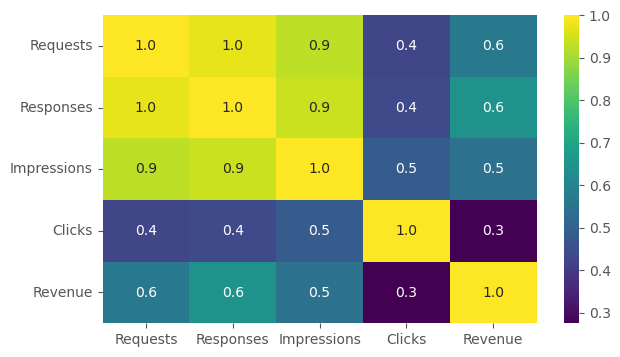

In [27]:
# correlation
correlation = df[['Requests', 'Responses', 'Impressions', 'Clicks', 'Revenue']].corr()

plt.figure(figsize = (7,4), dpi = 100)
sns.heatmap(correlation, fmt ='.1f', annot = True, cmap ='viridis')
plt.show()

* It can be clearly seen that is a strong correlation between these features.

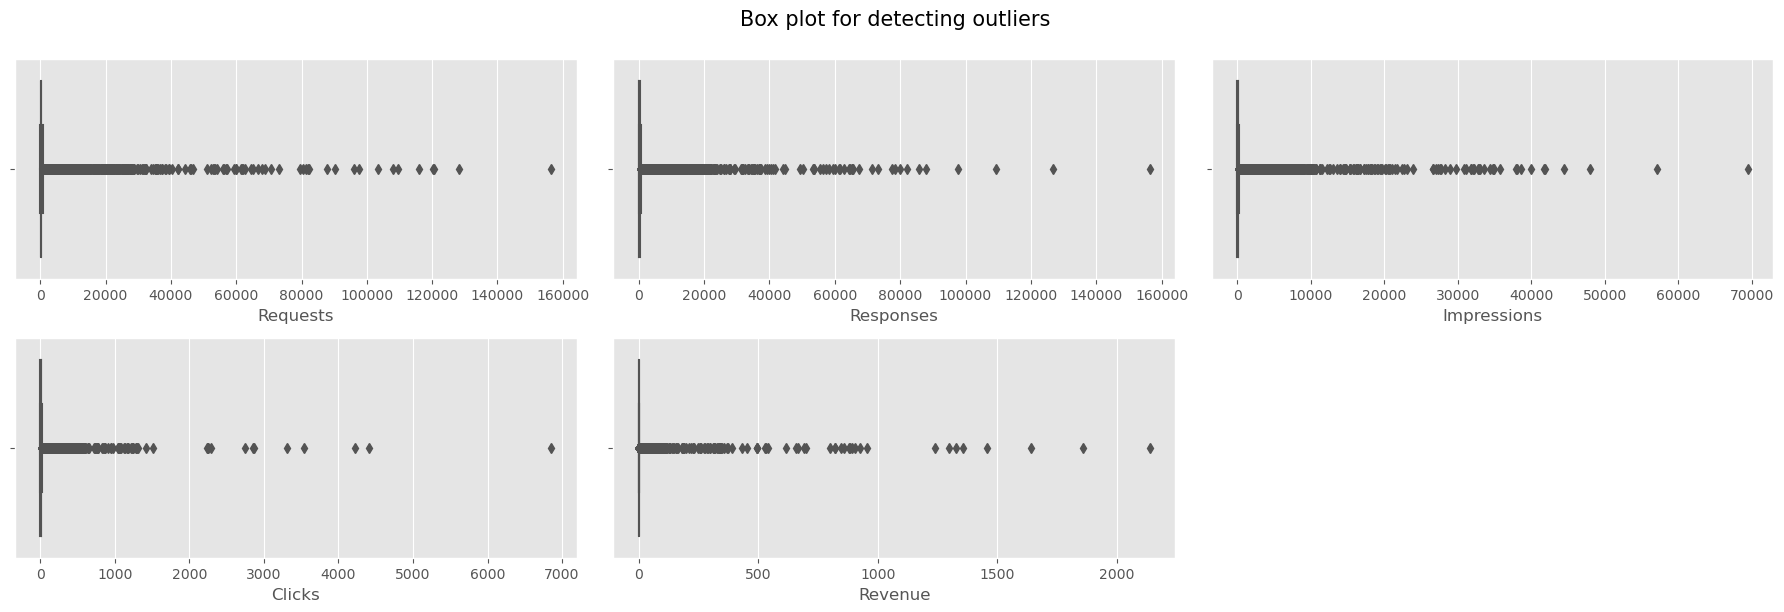

In [9]:
features = df[['Requests', 'Responses', 'Impressions', 'Clicks', 'Revenue']]

# checking anomalies/outliers in the features
plt.figure(figsize=(18,14), dpi=100)

for i, col in enumerate(features):
    ax = plt.subplot(5,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax)

plt.suptitle('Box plot for detecting outliers', y = 1.00, fontsize = 15)
plt.tight_layout()

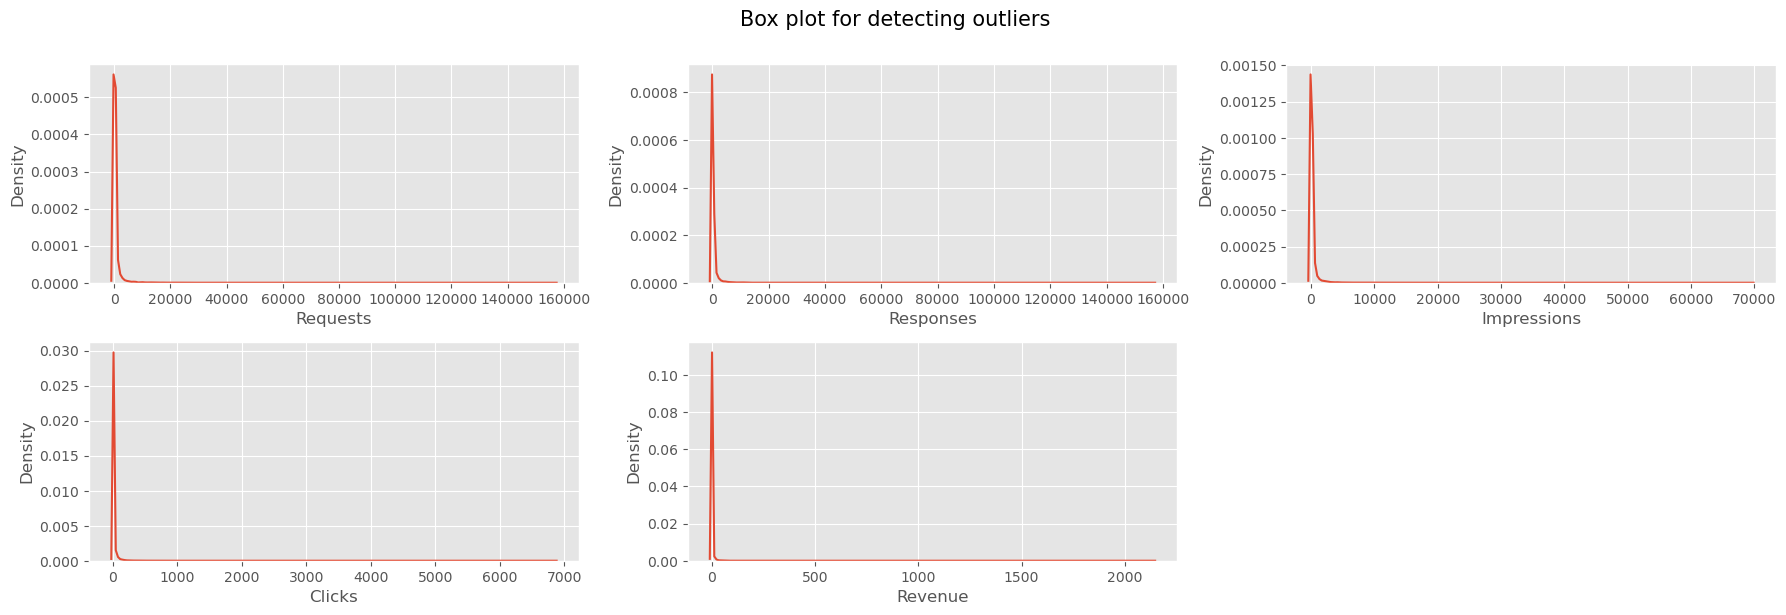

In [10]:
# checking anomalies/outliers in the features
plt.figure(figsize=(18,14), dpi=100)

for i, col in enumerate(features):
    ax = plt.subplot(5,3, i+1)
    sns.kdeplot(data=df, x=col, ax=ax)

plt.suptitle('Box plot for detecting outliers', y = 1.00, fontsize = 15)
plt.tight_layout()

### Conclusions :

**Requests** - Indicates the popularity or demand for the app. Higher values suggest a higher level of user engagement.

1. The majority of ad requests fall within a smaller range, with very few requests above a certain threshold.
2. There may be some outliers in the data, as evidenced by the long tail to the right of the distribution.
3. The data may be heavily influenced by certain factors, such as the time of day or day of the week when ads are requested.

**Responses** - Represents the number of times the network responded to the app's request for an ad with an actual ad. A high response rate indicates that the app is receiving relevant ads from the network, which can lead to higher revenue.

1. The distribution of responses is likely to be similar to that of requests, as the two variables are closely related. 
2. Advertisers are more likely to respond to requests from apps that have a large user base.

**Impressions** - This column represents the number of times an ad was displayed on a device screen. A high number of impressions can indicate that the app's users are engaging with the ads, which can lead to higher revenue.

1. Similar to requests and responses, the distribution of Impressions is likely to be skewed to the right. There are likely a few ads that are displayed on the screen much more frequently than others.

**Clicks** - This column represents the number of times a user clicked on an ad after it was displayed on their screen. A high click-through rate (CTR) indicates that the app's users are engaging with the ads and finding them relevant, which can lead to higher revenue.

1. There are likely a few ads that are generating a large number of clicks, while the majority of ads generate relatively few or no clicks.
2. It may indicate that certain ads are more appealing or relevant to the users, which leads to a higher click-through rate (CTR) for those ads.
3. The skewness of the Clicks column may also be influenced by factors such as ad placement, ad format, or user behavior. 

**Revenue** - This column represents the total amount of revenue made by the app from ad impressions and clicks. Higher revenue indicates that the app is successful in monetizing its user base.

1. A right-skewed distribution for the Revenue column means that the majority of revenue comes from a few successful ads that generated a high amount of revenue, while most ads generated little or no revenue.

## 2. Analyzing trends

### Requests

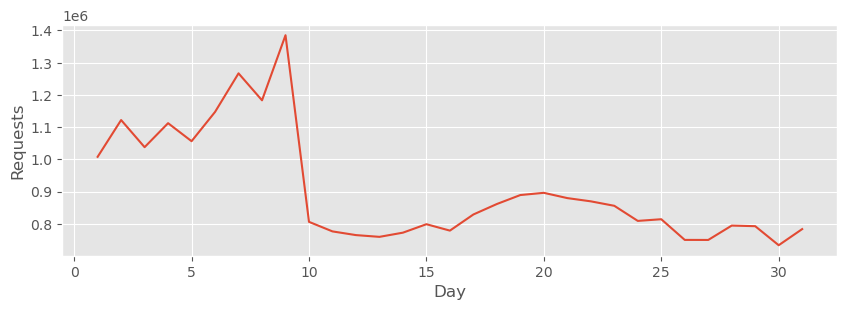

In [28]:
# using groupby to sum values for each day
requests = df.groupby('Day')['Requests'].sum().reset_index()

# plotting
plt.figure(figsize=(10,3))
sns.lineplot(x=requests['Day'], y=requests['Requests'])
plt.show()

#### Insights
Fluctuations in the requests of an ad could indicate several things depending on the context. Here are a few possible conclusions:

**Seasonal trends** : Some products or services may have seasonal demand, resulting in fluctuations in the number of ad requests. For example, a sunscreen brand may receive more ad requests in the summer months than in the winter months.

**Ad targeting** : The ad may be targeted to a specific audience, and fluctuations in requests may reflect changes in that audience's behavior or demographics. For example, an ad targeted at college students may see fluctuations in requests during breaks or exam periods.

**Ad performance** : Fluctuations in ad requests could also reflect changes in the ad's performance. For example, if an ad's click-through rate (CTR) drops suddenly, the number of ad requests may also decrease.

* In order to determine the cause of the fluctuation, it may be necessary to analyze data such as ad performance metrics, audience behavior, and market trends.

### Responses

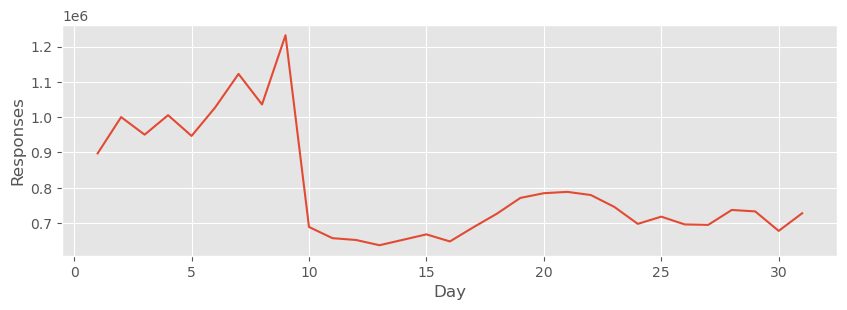

In [29]:
# using groupby to sum values for each day
responses = df.groupby('Day')['Responses'].sum().reset_index()

# plotting
plt.figure(figsize=(10,3))
sns.lineplot(x=responses['Day'], y=responses['Responses'])
plt.show()

#### Insights

There was a huge drop in the number of **Responses** (by 50% approx.) on the 10th of October, here are some conclusions that can be drawn:

**Ad performance**: The fluctuating responses suggest that the ad performance is not consistent. It could be possible that the ad has different appeal to different users or the ad creative or messaging is not resonating with the target audience.

**Target audience**: The drop in the number of responses suggests that the target audience may have changed or there could be changes in user behavior or preferences that resulted in the drop.

**Technical issues**: Technical issues such as website downtime, slow loading time, or technical errors could have resulted in the drop in the number of responses.

### Impressions

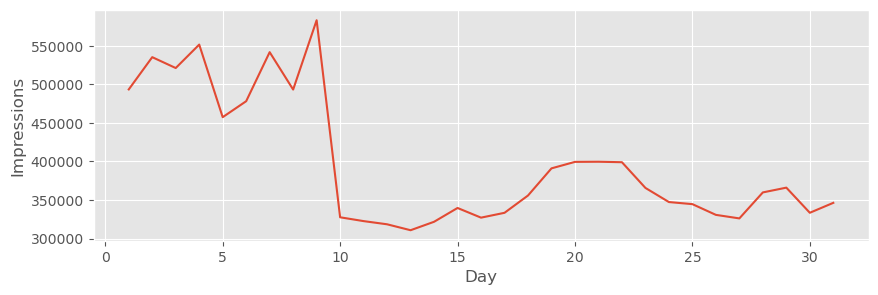

In [30]:
# using groupby to sum values for each day
impressions = df.groupby('Day')['Impressions'].sum().reset_index()

# plotting
plt.figure(figsize=(10,3))
sns.lineplot(x=impressions['Day'], y=impressions['Impressions'])
plt.show()

* It is not necessarily obvious why **Impressions** faced a huge drop on the 10th of October without further analysis. While it is possible that the drop in impressions is related to the drop in Responses and Requests, it is also possible that there are other factors at play that are affecting impressions specifically.

### Clicks

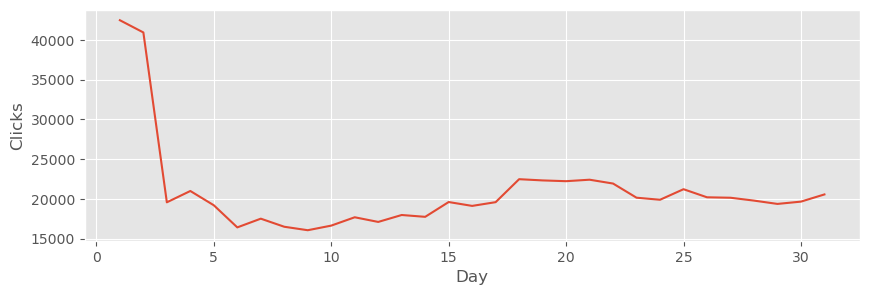

In [31]:
# using groupby to sum values for each day
clicks = df.groupby('Day')['Clicks'].sum().reset_index()

# plotting
plt.figure(figsize=(10,3))
sns.lineplot(x=clicks['Day'], y=clicks['Clicks'])
plt.show()

#### Insights

It's possible that the drop in **Clicks** on the 3rd of October is related to the drop in requests and responses, especially if the ad creative or messaging was consistent across all three metrics. However, it's also possible that the drop in clicks was due to other factors that didn't impact requests and responses in the same way.

* For example, the drop in clicks could have been caused by changes in ad placement or targeting settings, which would only impact clicks and not necessarily requests or responses. Additionally, changes in user behavior or preferences could have had a greater impact on clicks than on requests or responses.

### Revenue

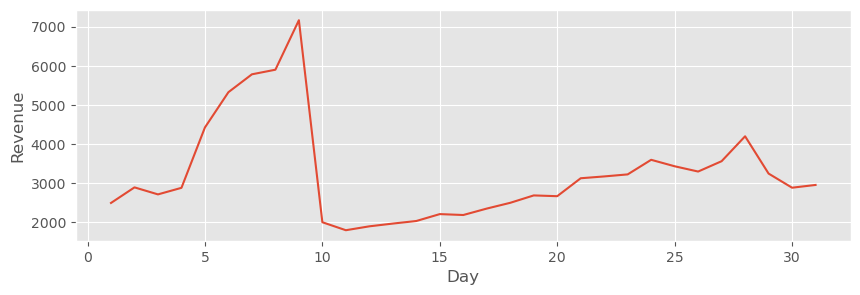

In [34]:
# using groupby to sum values for each day
revenue = df.groupby('Day')['Revenue'].sum().reset_index()

# plotting
plt.figure(figsize=(10,3))
sns.lineplot(x=revenue['Day'], y=revenue['Revenue'])
plt.show()

#### Insights

There was a sudden drop in **Revenue** generated by the ads on the 10th Oct.

1. Possible technical issue: The sudden drop in revenue may have been caused by a technical issue with the website or checkout process.
2. Ad performance: The ads that were running on the 10th may not have performed as well as other ads, resulting in lower revenue generation.
3. External factors: External factors such as changes in the market or changes in competitor behavior may have influenced revenue generation on the 10th.

**Fluctuations** in revenue generated from ads could indicate several things depending on the context. Here are a few possible conclusions:

1. **Seasonal trends** : Just like ad requests, some products or services may have seasonal demand, resulting in fluctuations in revenue generated from ads. For example, a winter sports equipment retailer may generate more revenue from ads during the winter months than in the summer months.

2. **Ad targeting**: Fluctuations in revenue generated from ads could also reflect changes in the effectiveness of the ad targeting. For example, if an ad is targeted to a specific audience, changes in that audience's behavior or demographics could impact revenue generation.

3. **Ad performance**: Changes in the performance of ads can also impact revenue generation. If an ad's click-through rate (CTR) or conversion rate changes, the revenue generated from the ad could also fluctuate.

* In order to determine the cause of the fluctuation, it may be necessary to analyze data such as ad performance metrics, audience behavior, market trends, and competitor behavior. Additionally, it may be helpful to conduct A/B testing or other experiments to identify potential solutions for optimizing revenue generation.